In [193]:
import sys

# Data Manipulation libraries:
import numpy as np
import pandas as pd
from copy import deepcopy
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Plotting libraries
import mplsoccer
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [194]:
eventsDataLaLiga2019 = pd.read_csv('data/matchwise_events_data_updated.csv')

C:\Users\parab\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (18,41,75,76,85,88,95,96,97,99,100,101,102,107,108,109,110,111,112,114,115,116,117,119,120,121,122,123,124,125,126,127,129,130,131,132,133,134,135,136,137,138,139) have mixed types.Specify dtype option on import or set low_memory=False.



# Seperate pass data

In [195]:
eventsPassdf = deepcopy(eventsDataLaLiga2019[eventsDataLaLiga2019["type.id"]==30])

In [196]:
eventsPassdf.columns[eventsPassdf.columns.str.startswith("pass")]

Index(['pass.recipient.id', 'pass.recipient.name', 'pass.length', 'pass.angle',
       'pass.height.id', 'pass.height.name', 'pass.end_location',
       'pass.body_part.id', 'pass.body_part.name', 'pass.type.id',
       'pass.type.name', 'pass.outcome.id', 'pass.outcome.name',
       'pass.assisted_shot_id', 'pass.shot_assist', 'pass.aerial_won',
       'pass.deflected', 'pass.switch', 'pass.cross', 'pass.through_ball',
       'pass.technique.id', 'pass.technique.name', 'pass.goal_assist',
       'pass.no_touch', 'pass.outswinging', 'pass.cut_back', 'pass.inswinging',
       'pass.straight', 'pass.miscommunication'],
      dtype='object')

In [197]:
eventsPassdf["under_pressure"].unique()

array([nan, True], dtype=object)

In [198]:
passAdditionalCols = ['match_id', 'id',
                      'timestamp', 'minute', 'second',
                      'type.id', 'type.name',
                      'possession_team.id', 'possession_team.name',
                      'play_pattern.id', 'play_pattern.name',
                      'team.id', 'team.name', 'location',
                      'player.id', 'player.name',
                      'position.id', 'position.name',
                      'under_pressure',
                      'started', 'minsPlayed']

In [199]:
pass_cols = eventsPassdf.columns[eventsPassdf.columns.str.startswith("pass")].tolist()
pass_cols = passAdditionalCols + pass_cols
pass_cols

['match_id',
 'id',
 'timestamp',
 'minute',
 'second',
 'type.id',
 'type.name',
 'possession_team.id',
 'possession_team.name',
 'play_pattern.id',
 'play_pattern.name',
 'team.id',
 'team.name',
 'location',
 'player.id',
 'player.name',
 'position.id',
 'position.name',
 'under_pressure',
 'started',
 'minsPlayed',
 'pass.recipient.id',
 'pass.recipient.name',
 'pass.length',
 'pass.angle',
 'pass.height.id',
 'pass.height.name',
 'pass.end_location',
 'pass.body_part.id',
 'pass.body_part.name',
 'pass.type.id',
 'pass.type.name',
 'pass.outcome.id',
 'pass.outcome.name',
 'pass.assisted_shot_id',
 'pass.shot_assist',
 'pass.aerial_won',
 'pass.deflected',
 'pass.switch',
 'pass.cross',
 'pass.through_ball',
 'pass.technique.id',
 'pass.technique.name',
 'pass.goal_assist',
 'pass.no_touch',
 'pass.outswinging',
 'pass.cut_back',
 'pass.inswinging',
 'pass.straight',
 'pass.miscommunication']

In [200]:
eventsPassdf = eventsPassdf[pass_cols]

In [201]:
eventsPassdf.shape

(37157, 50)

In [202]:
eventsPassdf.nunique(axis=0)

match_id                    33
id                       37157
timestamp                21028
minute                      98
second                      60
type.id                      1
type.name                    1
possession_team.id          20
possession_team.name        20
play_pattern.id              9
play_pattern.name            9
team.id                     20
team.name                   20
location                 34856
player.id                  367
player.name                367
position.id                 23
position.name               23
under_pressure               1
started                      1
minsPlayed                  94
pass.recipient.id          368
pass.recipient.name        368
pass.length              18411
pass.angle               28134
pass.height.id               3
pass.height.name             3
pass.end_location        35909
pass.body_part.id            7
pass.body_part.name          7
pass.type.id                 7
pass.type.name               7
pass.out

# Separate Num and Cat cols

In [203]:
eventsPassdf.select_dtypes(include="category").columns

Index([], dtype='object')

In [204]:
eventsPassdf.select_dtypes(include="object").columns

Index(['id', 'timestamp', 'type.name', 'possession_team.name',
       'play_pattern.name', 'team.name', 'location', 'player.name',
       'position.name', 'under_pressure', 'started', 'pass.recipient.name',
       'pass.height.name', 'pass.end_location', 'pass.body_part.name',
       'pass.type.name', 'pass.outcome.name', 'pass.assisted_shot_id',
       'pass.shot_assist', 'pass.aerial_won', 'pass.deflected', 'pass.switch',
       'pass.cross', 'pass.through_ball', 'pass.technique.name',
       'pass.goal_assist', 'pass.no_touch', 'pass.outswinging',
       'pass.cut_back', 'pass.inswinging', 'pass.straight',
       'pass.miscommunication'],
      dtype='object')

In [205]:
catPassCols = eventsPassdf.select_dtypes(include="object").columns
catPassCols

Index(['id', 'timestamp', 'type.name', 'possession_team.name',
       'play_pattern.name', 'team.name', 'location', 'player.name',
       'position.name', 'under_pressure', 'started', 'pass.recipient.name',
       'pass.height.name', 'pass.end_location', 'pass.body_part.name',
       'pass.type.name', 'pass.outcome.name', 'pass.assisted_shot_id',
       'pass.shot_assist', 'pass.aerial_won', 'pass.deflected', 'pass.switch',
       'pass.cross', 'pass.through_ball', 'pass.technique.name',
       'pass.goal_assist', 'pass.no_touch', 'pass.outswinging',
       'pass.cut_back', 'pass.inswinging', 'pass.straight',
       'pass.miscommunication'],
      dtype='object')

In [206]:
unwantedCols = ["player.name", "pass.recipient.name",
                "pass.end_location", "location",
                "pass.assisted_shot_id", "id", "timestamp",
                "position.name", "possession_team.name",
                "team.name", "type.name"]
catPassCols.symmetric_difference(unwantedCols)

Index(['pass.aerial_won', 'pass.body_part.name', 'pass.cross', 'pass.cut_back',
       'pass.deflected', 'pass.goal_assist', 'pass.height.name',
       'pass.inswinging', 'pass.miscommunication', 'pass.no_touch',
       'pass.outcome.name', 'pass.outswinging', 'pass.shot_assist',
       'pass.straight', 'pass.switch', 'pass.technique.name',
       'pass.through_ball', 'pass.type.name', 'play_pattern.name', 'started',
       'under_pressure'],
      dtype='object')

In [207]:
catPassCols

Index(['id', 'timestamp', 'type.name', 'possession_team.name',
       'play_pattern.name', 'team.name', 'location', 'player.name',
       'position.name', 'under_pressure', 'started', 'pass.recipient.name',
       'pass.height.name', 'pass.end_location', 'pass.body_part.name',
       'pass.type.name', 'pass.outcome.name', 'pass.assisted_shot_id',
       'pass.shot_assist', 'pass.aerial_won', 'pass.deflected', 'pass.switch',
       'pass.cross', 'pass.through_ball', 'pass.technique.name',
       'pass.goal_assist', 'pass.no_touch', 'pass.outswinging',
       'pass.cut_back', 'pass.inswinging', 'pass.straight',
       'pass.miscommunication'],
      dtype='object')

In [208]:
catPassCols = catPassCols.symmetric_difference(unwantedCols)

In [209]:
eventsPassdf['pass.height.name'].value_counts()

Ground Pass    26511
High Pass       5378
Low Pass        5268
Name: pass.height.name, dtype: int64

In [210]:
%timeit  eventsPassdf['pass.height.name'].value_counts()

9.01 ms ± 701 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [211]:
eventsPassdf["pass.height.name"] = eventsPassdf["pass.height.name"].astype("category")

In [212]:
eventsPassdf[catPassCols] = eventsPassdf[catPassCols].astype("category")

In [213]:
eventsPassdf.select_dtypes(exclude=['object','category']).columns

Index(['match_id', 'minute', 'second', 'type.id', 'possession_team.id',
       'play_pattern.id', 'team.id', 'player.id', 'position.id', 'minsPlayed',
       'pass.recipient.id', 'pass.length', 'pass.angle', 'pass.height.id',
       'pass.body_part.id', 'pass.type.id', 'pass.outcome.id',
       'pass.technique.id'],
      dtype='object')

In [214]:
numPassCols = ['pass.length','pass.angle','minsPlayed']

# Num EDA

In [215]:
eventsPassdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37157 entries, 4 to 129055
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   match_id               37157 non-null  int64   
 1   id                     37157 non-null  object  
 2   timestamp              37157 non-null  object  
 3   minute                 37157 non-null  int64   
 4   second                 37157 non-null  int64   
 5   type.id                37157 non-null  int64   
 6   type.name              37157 non-null  object  
 7   possession_team.id     37157 non-null  int64   
 8   possession_team.name   37157 non-null  object  
 9   play_pattern.id        37157 non-null  int64   
 10  play_pattern.name      37157 non-null  category
 11  team.id                37157 non-null  int64   
 12  team.name              37157 non-null  object  
 13  location               37157 non-null  object  
 14  player.id              37157 non-null

In [216]:
eventsPassdf[numPassCols].describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
pass.length,37157.0,19.4,13.0,0.0,10.7,16.0,24.1,109.6
pass.angle,37157.0,0.0,1.6,-3.1,-1.3,-0.0,1.3,3.1
minsPlayed,37157.0,82.6,18.5,0.0,82.0,91.0,93.0,97.0


In [217]:
eventsPassdf.isnull().sum()

match_id                     0
id                           0
timestamp                    0
minute                       0
second                       0
type.id                      0
type.name                    0
possession_team.id           0
possession_team.name         0
play_pattern.id              0
play_pattern.name            0
team.id                      0
team.name                    0
location                     0
player.id                    0
player.name                  0
position.id                  0
position.name                0
under_pressure           31860
started                   3012
minsPlayed                   0
pass.recipient.id         1437
pass.recipient.name       1437
pass.length                  0
pass.angle                   0
pass.height.id               0
pass.height.name             0
pass.end_location            0
pass.body_part.id         1415
pass.body_part.name       1415
pass.type.id             31752
pass.type.name           31752
pass.out

from documentation , if pass outcome is null it means successful pass

In [218]:
for col in eventsPassdf[catPassCols]:
    print(col,"\n",eventsPassdf[col].unique(),"\n")

pass.aerial_won 
 [NaN, True]
Categories (1, object): [True] 

pass.body_part.name 
 [Right Foot, Left Foot, Head, Keeper Arm, NaN, Other, Drop Kick, No Touch]
Categories (7, object): [Right Foot, Left Foot, Head, Keeper Arm, Other, Drop Kick, No Touch] 

pass.cross 
 [NaN, True]
Categories (1, object): [True] 

pass.cut_back 
 [NaN, True]
Categories (1, object): [True] 

pass.deflected 
 [NaN, True]
Categories (1, object): [True] 

pass.goal_assist 
 [NaN, True]
Categories (1, object): [True] 

pass.height.name 
 [Ground Pass, High Pass, Low Pass]
Categories (3, object): [Ground Pass, High Pass, Low Pass] 

pass.inswinging 
 [NaN, True]
Categories (1, object): [True] 

pass.miscommunication 
 [NaN, True]
Categories (1, object): [True] 

pass.no_touch 
 [NaN, True]
Categories (1, object): [True] 

pass.outcome.name 
 [NaN, Incomplete, Pass Offside, Out, Unknown, Injury Clearance]
Categories (5, object): [Incomplete, Pass Offside, Out, Unknown, Injury Clearance] 

pass.outswinging 
 [Na

In [219]:
eventsPassdf[["pass.outcome.id","pass.outcome.name"]].drop_duplicates()

,pass.outcome.id,pass.outcome.name
4,NaN,NaN
46,9.0,Incomplete
219,76.0,Pass Offside
435,75.0,Out
1366,77.0,Unknown
1985,74.0,Injury Clearance


In [220]:
eventsPassdf["pass.outcome.id"] = np.where(eventsPassdf["pass.outcome.id"].isnull(), 1,
                                          eventsPassdf["pass.outcome.id"])
eventsPassdf["pass.outcome.name"] = np.where(eventsPassdf["pass.outcome.name"].isnull(), "Complete",
                                            eventsPassdf["pass.outcome.name"])

In [221]:
eventsPassdf[["pass.outcome.id", "pass.outcome.name"]].drop_duplicates()

,pass.outcome.id,pass.outcome.name
4,1.0,Complete
46,9.0,Incomplete
219,76.0,Pass Offside
435,75.0,Out
1366,77.0,Unknown
1985,74.0,Injury Clearance


In [222]:
booleanCols = ["under_pressure", "pass.shot_assist", "pass.aerial_won",
               "pass.deflected", "pass.switch", "pass.cross", "pass.through_ball",
               "pass.goal_assist", "pass.no_touch", "pass.outswinging",
               "pass.cut_back", "pass.inswinging", "pass.straight", "pass.miscommunication"]

In [223]:
eventsPassdf["under_pressure"] = eventsPassdf["under_pressure"].cat.add_categories(False)

In [224]:
eventsPassdf["under_pressure"].unique()

[NaN, True]
Categories (1, object): [True]

In [225]:
eventsPassdf["under_pressure"].fillna(False)

4         False
6         False
9         False
12        False
15        False
          ...  
129045    False
129047    False
129049    False
129052    False
129055    False
Name: under_pressure, Length: 37157, dtype: category
Categories (2, object): [True, False]

In [226]:
for col in booleanCols:
    try:
        eventsPassdf[col] = eventsPassdf[col].cat.add_categories(False)
    except ValueError:
        print(sys.exc_info())
        
    eventsPassdf[col] = eventsPassdf[col].fillna(False)

(<class 'ValueError'>, ValueError('new categories must not include old categories: {False}'), <traceback object at 0x000001EA04577080>)


In [227]:
eventsPassdf[booleanCols]

,under_pressure,pass.shot_assist,pass.aerial_won,pass.deflected,pass.switch,pass.cross,pass.through_ball,pass.goal_assist,pass.no_touch,pass.outswinging,pass.cut_back,pass.inswinging,pass.straight,pass.miscommunication
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129045,False,False,False,False,False,False,False,False,False,False,False,False,False,False
129047,False,False,False,False,False,False,False,False,False,False,False,False,False,False
129049,False,False,False,False,False,False,False,False,False,False,False,False,False,False
129052,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [228]:
for i in catPassCols:
    print(i,"\n",round(eventsPassdf[i].value_counts(normalize=True)*100,3))

pass.aerial_won 
 False    98.958
True      1.042
Name: pass.aerial_won, dtype: float64
pass.body_part.name 
 Right Foot    61.264
Left Foot     34.405
Head           2.812
Keeper Arm     0.831
Other          0.319
Drop Kick      0.190
No Touch       0.179
Name: pass.body_part.name, dtype: float64
pass.cross 
 False    98.232
True      1.768
Name: pass.cross, dtype: float64
pass.cut_back 
 False    99.857
True      0.143
Name: pass.cut_back, dtype: float64
pass.deflected 
 False    99.828
True      0.172
Name: pass.deflected, dtype: float64
pass.goal_assist 
 False    99.822
True      0.178
Name: pass.goal_assist, dtype: float64
pass.height.name 
 Ground Pass    71.349
High Pass      14.474
Low Pass       14.178
Name: pass.height.name, dtype: float64
pass.inswinging 
 False    99.68
True      0.32
Name: pass.inswinging, dtype: float64
pass.miscommunication 
 False    99.941
True      0.059
Name: pass.miscommunication, dtype: float64
pass.no_touch 
 False    99.828
True      0.172
Name:

# Visual EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA63714460>,
      dtype=object)

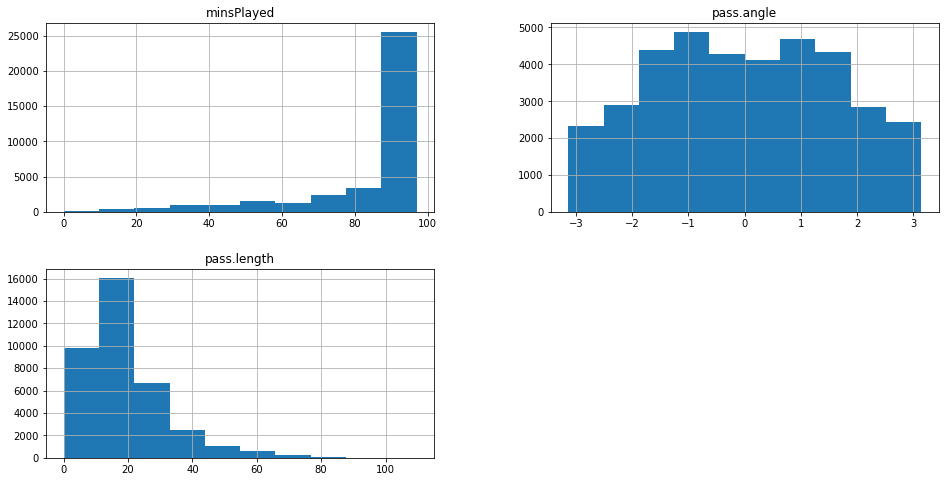

In [229]:
eventsPassdf[numPassCols].hist(bins=10,figsize = (16,8))

In [230]:
eventsPassdf['play_pattern.name'].value_counts().reset_index()

,index,play_pattern.name
0,Regular Play,16344
1,From Throw In,7668
2,From Free Kick,6725
3,From Goal Kick,2633
4,From Kick Off,1643
5,From Corner,1273
6,From Keeper,640
7,From Counter,176
8,Other,55


In [231]:
len(catPassCols)

21

In [232]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=5, cols=5,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=catPassCols)
# Add bar plot for goals conceded in all subplots:
for col in catPassCols:
    plot_df = eventsPassdf[col].value_counts().reset_index()
    fig.add_trace(go.Bar(x=plot_df["index"],
                         y=plot_df[col],
                         text=plot_df[col],
                         name=col),
                  row=i, col=j)
    j += 1
    if j > 5:
        j = 1
        i += 1
fig.update_traces(textposition='inside', textfont_size=10)
fig.update_layout(height=1600)

fig.show()

# Top Passing Teams

In [233]:
teamWisedf = eventsPassdf.groupby("team.id").agg({"team.name":"first","match_id":"nunique","type.id":"count"})

In [234]:
teamWisedf.columns = ["teamName","nMatches","nPasses"]

In [235]:
teamWisedf

,teamName,nMatches,nPasses
team.id,,,
205,Leganés,2,543
206,Deportivo Alavés,2,734
207,Valencia,1,325
209,Celta Vigo,2,788
210,Real Sociedad,2,1083
212,Atlético Madrid,2,686
213,Sevilla,2,899
214,Espanyol,2,629
215,Athletic Bilbao,1,303


In [236]:
teamWisedf["passesPerMatch"] = teamWisedf.nPasses / teamWisedf.nMatches

In [237]:
teamWisedf.style.highlight_max()

,teamName,nMatches,nPasses,passesPerMatch
team.id,,,,
205,Leganés,2,543,271.500000
206,Deportivo Alavés,2,734,367.000000
207,Valencia,1,325,325.000000
209,Celta Vigo,2,788,394.000000
210,Real Sociedad,2,1083,541.500000
212,Atlético Madrid,2,686,343.000000
213,Sevilla,2,899,449.500000
214,Espanyol,2,629,314.500000
215,Athletic Bilbao,1,303,303.000000


In [238]:
teamWisedf.style.bar().set_precision(1)

,teamName,nMatches,nPasses,passesPerMatch
team.id,,,,
205,Leganés,2,543,271.5
206,Deportivo Alavés,2,734,367.0
207,Valencia,1,325,325.0
209,Celta Vigo,2,788,394.0
210,Real Sociedad,2,1083,541.5
212,Atlético Madrid,2,686,343.0
213,Sevilla,2,899,449.5
214,Espanyol,2,629,314.5
215,Athletic Bilbao,1,303,303.0


In [239]:
teamWisedf.style.bar(subset=["passesPerMatch"]).set_precision(1)

,teamName,nMatches,nPasses,passesPerMatch
team.id,,,,
205,Leganés,2,543,271.5
206,Deportivo Alavés,2,734,367.0
207,Valencia,1,325,325.0
209,Celta Vigo,2,788,394.0
210,Real Sociedad,2,1083,541.5
212,Atlético Madrid,2,686,343.0
213,Sevilla,2,899,449.5
214,Espanyol,2,629,314.5
215,Athletic Bilbao,1,303,303.0


In [244]:
def color_av_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if val.dtype == "object":
        return [""]*len(val)
    valMean = val.mean()
    colors = ['color:green' if (v > valMean) else 'color:red' for v in val]
    return colors

In [245]:
teamWisedf.style.apply(color_av_red).set_precision(1)

,teamName,nMatches,nPasses,passesPerMatch
team.id,,,,
205,Leganés,2,543,271.5
206,Deportivo Alavés,2,734,367.0
207,Valencia,1,325,325.0
209,Celta Vigo,2,788,394.0
210,Real Sociedad,2,1083,541.5
212,Atlético Madrid,2,686,343.0
213,Sevilla,2,899,449.5
214,Espanyol,2,629,314.5
215,Athletic Bilbao,1,303,303.0


# Top passing players

In [246]:
playerWisedf = eventsPassdf.groupby("player.id").agg({"player.name": "first", "team.name": "first",
                                                     "match_id": "nunique", "type.id": "count"})

In [247]:
playerWisedf["passesPerMatch"] = playerWisedf["type.id"].divide(playerWisedf["match_id"])

In [248]:
playerWisedf.style.apply(color_av_red).set_precision(1)

,player.name,team.name,match_id,type.id,passesPerMatch
player.id,,,,,
2948.0,Nabil Fekir,Real Betis,1,17,17.0
3042.0,Mikel Merino Zazón,Real Sociedad,2,101,50.5
3058.0,Javier Hernández Balcázar,Sevilla,1,7,7.0
3122.0,Yannis Salibur,Mallorca,1,7,7.0
3139.0,Chidozie Collins Awaziem,Leganés,1,19,19.0
3141.0,André-Frank Zambo Anguissa,Villarreal,2,97,48.5
3236.0,Sergi Darder Moll,Espanyol,2,33,16.5
3245.0,Thomas Lemar,Atlético Madrid,2,6,3.0
3246.0,Guido Marcelo Carrillo,Leganés,2,13,6.5


In [249]:
avgPassesPerMatch = playerWisedf["passesPerMatch"].mean()

In [250]:
playerWisedf[playerWisedf["passesPerMatch"] > avgPassesPerMatch].style.apply(color_av_red).set_precision(1)

,player.name,team.name,match_id,type.id,passesPerMatch
player.id,,,,,
3042.0,Mikel Merino Zazón,Real Sociedad,2,101,50.5
3141.0,André-Frank Zambo Anguissa,Villarreal,2,97,48.5
3308.0,Kieran Trippier,Atlético Madrid,1,57,57.0
3366.0,Diego Carlos Santos Silva,Sevilla,2,63,31.5
3497.0,Vicente Iborra De La Fuente,Villarreal,2,81,40.5
3498.0,Ignacio Monreal Eraso,Real Sociedad,2,93,46.5
3515.0,Alberto Moreno Pérez,Villarreal,1,47,47.0
3804.0,Ferland Mendy,Real Madrid,1,64,64.0
4445.0,Jules Koundé,Sevilla,1,40,40.0


In [251]:
playerWisedf[playerWisedf["passesPerMatch"] > avgPassesPerMatch].style.highlight_max()

,player.name,team.name,match_id,type.id,passesPerMatch
player.id,,,,,
3042.0,Mikel Merino Zazón,Real Sociedad,2,101,50.500000
3141.0,André-Frank Zambo Anguissa,Villarreal,2,97,48.500000
3308.0,Kieran Trippier,Atlético Madrid,1,57,57.000000
3366.0,Diego Carlos Santos Silva,Sevilla,2,63,31.500000
3497.0,Vicente Iborra De La Fuente,Villarreal,2,81,40.500000
3498.0,Ignacio Monreal Eraso,Real Sociedad,2,93,46.500000
3515.0,Alberto Moreno Pérez,Villarreal,1,47,47.000000
3804.0,Ferland Mendy,Real Madrid,1,64,64.000000
4445.0,Jules Koundé,Sevilla,1,40,40.000000


In [252]:
playerWisedf[playerWisedf["passesPerMatch"] > avgPassesPerMatch].style.bar().set_precision(1)

,player.name,team.name,match_id,type.id,passesPerMatch
player.id,,,,,
3042.0,Mikel Merino Zazón,Real Sociedad,2,101,50.5
3141.0,André-Frank Zambo Anguissa,Villarreal,2,97,48.5
3308.0,Kieran Trippier,Atlético Madrid,1,57,57.0
3366.0,Diego Carlos Santos Silva,Sevilla,2,63,31.5
3497.0,Vicente Iborra De La Fuente,Villarreal,2,81,40.5
3498.0,Ignacio Monreal Eraso,Real Sociedad,2,93,46.5
3515.0,Alberto Moreno Pérez,Villarreal,1,47,47.0
3804.0,Ferland Mendy,Real Madrid,1,64,64.0
4445.0,Jules Koundé,Sevilla,1,40,40.0


# Top Passing Players - Per90

In [253]:
playerMatchMinsdf = eventsPassdf.drop_duplicates(subset=['player.id','match_id']).groupby(["player.id"])\
.agg({"minsPlayed":"sum"})
#drop duplicates so that we get only one record for one player for one match.

In [254]:
playerMatchMinsdf

,minsPlayed
player.id,
2948.0,75.0
3042.0,187.0
3058.0,28.0
3122.0,11.0
3139.0,96.0
...,...
32953.0,26.0
34515.0,23.0
40881.0,92.0


In [255]:
playerWisedf = eventsPassdf.groupby("player.id").agg({"player.name": "first", "team.name": "first",
                                                     "match_id": "nunique", "type.id": "count"})

In [256]:
playerWisedf.shape , playerMatchMinsdf.shape

((367, 4), (367, 1))

In [257]:
pd.concat([playerWisedf, playerMatchMinsdf], axis=1)

,player.name,team.name,match_id,type.id,minsPlayed
player.id,,,,,
2948.0,Nabil Fekir,Real Betis,1,17,75.0
3042.0,Mikel Merino Zazón,Real Sociedad,2,101,187.0
3058.0,Javier Hernández Balcázar,Sevilla,1,7,28.0
3122.0,Yannis Salibur,Mallorca,1,7,11.0
3139.0,Chidozie Collins Awaziem,Leganés,1,19,96.0
...,...,...,...,...,...
32953.0,Asier Villalibre Molina,Athletic Bilbao,1,2,26.0
34515.0,Fernando Niño Rodriguez,Villarreal,1,7,23.0
40881.0,Enrique Pérez Muñoz,Real Valladolid,1,41,92.0


In [258]:
playerWisedf = pd.concat([playerWisedf, playerMatchMinsdf], axis=1)

In [259]:
#match id shows number of matches; type id number of passes

In [260]:
playerWisedf['passesPerMatch'] = playerWisedf["type.id"].divide(playerWisedf['match_id'])

In [261]:
playerWisedf["passesPer90"] = playerWisedf["type.id"].divide(playerWisedf["minsPlayed"])*90

In [262]:
avgPassesPer90 = playerWisedf['passesPer90'].mean()

In [263]:
playerWisedf[playerWisedf["passesPer90"] > avgPassesPer90].style.bar(subset = ['passesPerMatch',
                                                                              "passesPer90"]).set_precision(1)

,player.name,team.name,match_id,type.id,minsPlayed,passesPerMatch,passesPer90
player.id,,,,,,,
3042.0,Mikel Merino Zazón,Real Sociedad,2,101,187.0,50.5,48.6
3122.0,Yannis Salibur,Mallorca,1,7,11.0,7.0,57.3
3141.0,André-Frank Zambo Anguissa,Villarreal,2,97,180.0,48.5,48.5
3308.0,Kieran Trippier,Atlético Madrid,1,57,93.0,57.0,55.2
3497.0,Vicente Iborra De La Fuente,Villarreal,2,81,139.0,40.5,52.4
3498.0,Ignacio Monreal Eraso,Real Sociedad,2,93,186.0,46.5,45.0
3508.0,Sandro Ramírez Castillo,Real Valladolid,1,14,33.0,14.0,38.2
3515.0,Alberto Moreno Pérez,Villarreal,1,47,94.0,47.0,45.0
3804.0,Ferland Mendy,Real Madrid,1,64,94.0,64.0,61.3


In [264]:
eventsPassdf.to_csv("data/eventsPassdf.csv")